# Lab08 - Bài tập

### Bài 1

Nghiên cứu mức thu nhập ($X$) và chi tiêu ($Y$) trong một tháng của một công ty. Khảo sát ngẫu nhiên 7 nhân viên, ta thu được bảng số liệu sau:

| X            | 130     | 150      | 133      | 170      | 170      | 210      | 230      |
| :----------: | :-----: | :------: | :------: | :------: | :------: | :------: | :------: |
| **Y**        | **84**  | **120**  | **108**  | **130**  | **130**  | **150**  | **160**  |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước tính chi tiêu dựa theo thu nhập

b. Dự đoán mức chi tiêu của nhân viên công ty trên nếu biết thu nhập là 200$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

In [2]:
#1a
x = np.array([130, 150, 133, 170, 170, 210, 230])
y = np.array([84, 120, 108, 130, 130, 150, 160])

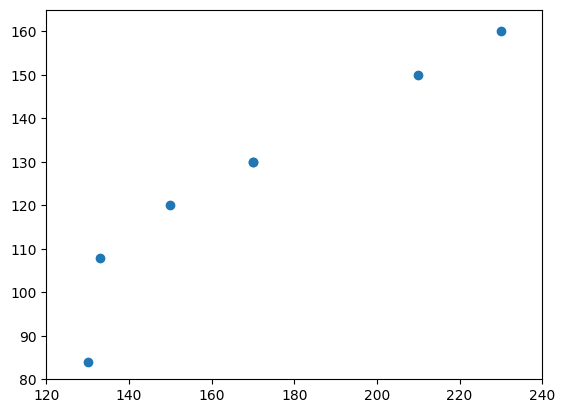

In [3]:
plt.plot(x, y, 'o')
plt.axis([120, 240, 80, 165])
plt.show()

In [4]:
np.corrcoef(x, y)

array([[1.        , 0.94705241],
       [0.94705241, 1.        ]])

In [5]:
tu = sum((x - x.mean()) * (y - y.mean()))
print("Tử số:", tu)

mau = sum((x - x.mean()) * (x - x.mean()))
print("Mẫu số:", mau)

b1 = tu / mau
print('B1=', b1)

b0 = y.mean() - b1 * x.mean()
print("B0 =", b0)

print(f"Mô hình hồi quy tuyến tính y = {b0.round(4)} + {b1.round(4)}x")

Tử số: 5466.0
Mẫu số: 8567.714285714286
B1= 0.6379764564644679
B0 = 17.270583919698552
Mô hình hồi quy tuyến tính y = 17.2706 + 0.638x


In [67]:
#b dự đoán mức chi tiêu của nhân viên khi biết thu nhập là 200$
model = sm.formula.ols('y~x', data=pd.DataFrame({'x': x, 'y':y})).fit()
model.params
print("Chi tiêu:", 17.2706 + 0.638 * 200)

Chi tiêu: 144.87060000000002


### Bài 2

Tiến hành nghiên cứu mối quan hệ giữa:

- X: giá bán kẻ của thịt gà (nghìn/kg) 
- Y: lượng thịt gà tiêu thụ (kg/tháng)

Dữ liệu thu được gồm 10 tháng như sau:

| X            | 35       | 40       | 45       | 40       | 38       | 40       | 45       | 30       | 42       | 38       |
| :----------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: | :------: |
| **Y**        | **2.29** | **2.04** | **0.59** | **2.06** | **2.50** | **2.32** | **1.57** | **3.96** | **1.43** | **2.34** |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước tính lượng tiêu thụ thịt gà theo giá bán.

b. Dự đoán lượng tiêu thụ khi giá bán lẻ là 41(kg/tháng)

In [69]:
x = np.array([35, 40, 45, 40, 38, 40, 45, 30, 42, 38])
y = np.array([2.29, 2.04, 0.59, 2.06, 2.50, 2.32, 1.57, 3.96, 1.43, 2.34])

In [70]:
np.corrcoef(x, y)

array([[ 1.        , -0.91953287],
       [-0.91953287,  1.        ]])

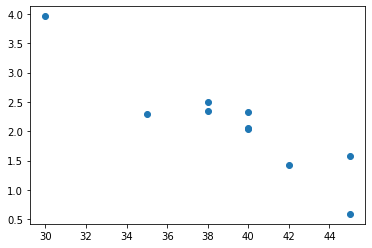

In [73]:
plt.plot(x, y, 'o')
plt.show()

In [74]:
tu = sum((x - x.mean()) * (y - y.mean()))
print("Tử số:", tu)

mau = sum((x - x.mean()) * (x - x.mean()))
print("Mẫu số:", mau)

b1 = tu / mau
print('B1=', b1)

b0 = y.mean() - b1 * x.mean()
print("B0 =", b0)

print(f"Mô hình hồi quy tuyến tính y = {b0.round(4)} + {b1.round(4)}x")

Tử số: -32.300000000000004
Mẫu số: 182.10000000000002
B1= -0.17737506864360242
B0 = 9.080840197693576
Mô hình hồi quy tuyến tính y = 9.0808 + -0.1774x


In [75]:
#b>
print("Dự đoán tiêu thụ khi giá bán lẻ là 41:", 9.0808 - 0.1774 * 41)

Dự đoán tiêu thụ khi giá bán lẻ là 41: 1.8073999999999995


## Bài 3

Dụa trên file dữ liệu `Advertising.csv` bạn hãy dự đoán doanh số bán hàng (`sales`) dựa trên số tiền chi cho các nền tảng tiếp thị khác nhau như `TV`, `Radio` và `Newspaper`

a. Đọc file dữ liệu cho biết các thông tin cơ bản về dữ liệu: kích thước, dữ liệu có giá trị trống hay không, hiện các giá trị thống kê cơ bản của các thuộc tính.

b. Để dự đoán doanh số bằng phương pháp hồi quy tuyến tính đơn giản (Simple Linear Regression) trước tiên cần lựa chọn một trong các thuộc tính còn lại. Theo bạn thuộc tính nào phù hợp để xây dựng mô hình hồi quy. Giải thích và minh họa bằng 2 cách

c. Xây dụng phương trình hồi quy, trực quan mô hình (đường thẳng) tìm được. Theo bạn để đánh giá mô hình trên cần dùng đại lượng nào?

In [85]:
#a>
data = pd.read_csv('Advertising.csv', header = 0)

print("Kích thước dữ liệu:\n",data.shape)
print("Kiểm tra giá trị trống:\n", data.isnull().sum())
print("Các giá trị thống kê cơ bản:\n", data.describe())

Kích thước dữ liệu:
 (200, 5)
Kiểm tra giá trị trống:
 Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64
Các giá trị thống kê cơ bản:
        Unnamed: 0          TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [86]:
#b>
#C1: Tính toán hệ số tương quan
correlation = data.corr()
print("Hệ số tương quan:\n", correlation['sales'])

'''
dựa vào hệ số tương quan, ta chọn thuộc tính 'TV' để xây dựng mô hình hồi quy. 
Vì nó hệ số tương quan cao nhất trong các thuộc tính
'''

Hệ số tương quan:
 Unnamed: 0   -0.051616
TV            0.782224
radio         0.576223
newspaper     0.228299
sales         1.000000
Name: sales, dtype: float64


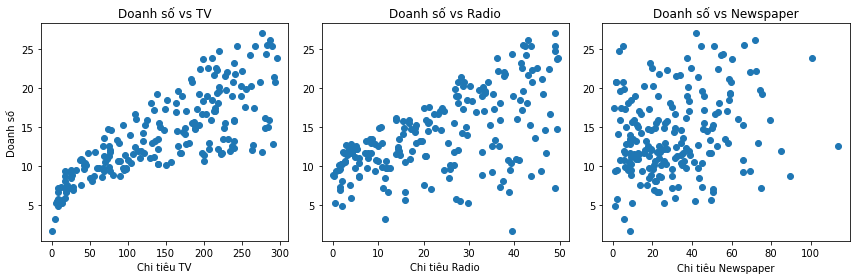

"\nDựa vào biểu đồ phân tán, ta có thể thấy thuộc tính 'Tv' và thuộc tính 'sales's có mối quan hệ mạnh mẽ \nvà có xu hướng tăng cao hơn so với các thuộc tính khác. Vì vậy có thể chọn thuộc tính 'Tv' để xây dựng\nmô hình hồi quy\n"

In [93]:
#C2 vẽ biểu đồ phân tán
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(data['TV'], data['sales'])
plt.title('Doanh số vs TV')
plt.xlabel('Chi tiêu TV')
plt.ylabel('Doanh số')

plt.subplot(1, 3, 2)
plt.scatter(data['radio'], data['sales'])
plt.title('Doanh số vs Radio')
plt.xlabel('Chi tiêu Radio')

plt.subplot(1, 3, 3)
plt.scatter(data['newspaper'], data['sales'])
plt.title('Doanh số vs Newspaper')
plt.xlabel('Chi tiêu Newspaper')

plt.tight_layout()
plt.show()

'''
Dựa vào biểu đồ phân tán, ta có thể thấy thuộc tính 'Tv' và thuộc tính 'sales's có mối quan hệ mạnh mẽ 
và có xu hướng tăng cao hơn so với các thuộc tính khác. Vì vậy có thể chọn thuộc tính 'Tv' để xây dựng
mô hình hồi quy
'''

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           1.47e-42
Time:                        14:30:59   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

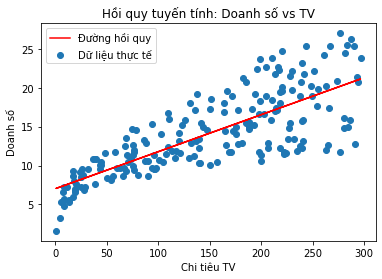

In [95]:
import statsmodels.api as sm

# Xây dựng mô hình hồi quy
X = data['TV']
Y = data['sales']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

plt.scatter(data['TV'], data['sales'], label='Dữ liệu thực tế')
plt.plot(data['TV'], model.predict(X), color='red', label='Đường hồi quy')
plt.title('Hồi quy tuyến tính: Doanh số vs TV')
plt.xlabel('Chi tiêu TV')
plt.ylabel('Doanh số')
plt.legend()
plt.show()


---